#### Problem 2.24
##### Consider a simplified learning scenario. Assume that the input dimension is one. Assume that the input variable $x$ is uniformly distributed in the interval $[−1,1]$. The data set consists of 2 points $\{x_1, x_2\}$ and assume that the target function is $f(x) = x^2$. Thus, the full data set is $D = \{(x_1, x_1^2), (x_2, x_2^2)\}$. The learning algorithm returns the line fitting these two points as $g(H$ consists of functions of the form $h(x) = ax + b)$. We are interested in the test performance $(E_{out})$ of our learning system with respect to the squared error measure, the bias and the var.

##### (a) Give the analytic expression of the average function $\bar{g}(x)$.

* Considering $g^D(x) = ax_i + b$, we need to find $a$ and $b$

* We have $E_{in}(g) = \sum_{i=1}^{2}[x_i^2 - (ax_i + b)]^2$

* Derivative w.r.t $a$, $\frac{\partial E_{in}(g)}{\partial a} = -2\sum_{i=1}^{2}x_i(x_i^2 - ax_i - b) = x_1(x_1^2 - ax_1 - b) + x_2(x_2^2 - ax_2 - b) = 0$

* Derivative w.r.t $b$, $\frac{\partial E_{in}(g)}{\partial b} = -2\sum_{i=1}^{2}(x_i^2 - ax_i - b) = (x_1^2 - ax_1 - b) + (x_2^2 - ax_2 - b) = 0$

* Multiply the second derivative by $x_1$ and subtract from first derivative, we get $x_2^2 - ax_2 - b = 0$

* Multiply the second derivative by $x_2$ and subtract from first derivative, we get $x_1^2 - ax_1 - b = 0$

* To get $a$, substitution by $b = x_2^2 - ax_2$ yeilds:

    $x_1^2 - ax_1 - x_2^2 - ax_2 = 0$
    
    $x_1^2 - x_2^2 - a(x_1 - x_2) = 0$

    $(x_1 - x_2)(x_1 + x_2) - a(x_1 - x_2) = 0$

    $(x_1 - x_2)[(x_1 + x_2) - a] = 0$

    $a = x_1 + x_2$

* Substitute by $a = x_1 + x_2$ to get $b$: 

    $x_2^2 - (x_1 + x_2)x_2 - b = 0$

    $x_2(x_2 - x_1 - x_2) = b$

    $b = -x_1x_2$

* Now, we have $g^D(x) = (x_1 + x_2)x_i - x_1x_2$

* To get the average function, $\bar{g}(x) = E_D[g^D(x)] = E_D[(x_1 + x_2)x_i - x_1x_2] = \int_{-1}^1{\int_{-1}^1{(x_1 + x_2) dx_1dx_2}}.x_i - \int_{-1}^1{\int_{-1}^1{(x_1x_2) dx_1dx_2}} = 0 - 0 = 0$ 

##### (b) Describe an experiment that you could run to determine (numerically) $\bar{g}(x)$, $E_{out}$, bias and var.

In [71]:
import numpy as np
import matplotlib.pyplot as plt


f = lambda x: x**2

def g(x1, x2, x):
    return (x1 + x2) * x + (-1 * x1 * x2)

def get_sample_x():
    return np.random.uniform(-1, 1, 1)[0]

def g_bar(x, samples):
    gs = [g(get_sample_x(), get_sample_x(), x) for _ in range(samples)]
    avg_g = np.mean(gs)
    return avg_g, np.var(gs), (avg_g - f(x))**2

def expirement(samples):
    fs = []
    gs = []
    var = []
    bias = []
    eout = []
    xs = np.linspace(-1, 1, samples)

    for x in xs:
        g_avg, g_var, g_bias = g_bar(x, samples)
        es = [(g(get_sample_x(), get_sample_x(), x) - f(x))**2 for _ in range(samples)]
        e_avg = np.mean(es)

        fs.append(f(x))
        gs.append(g_avg)
        var.append(g_var)
        bias.append(g_bias)
        eout.append(e_avg)

    return xs, fs, gs, np.mean(var), np.mean(bias), np.mean(eout)

##### (c) Run your experiment and report the results. Compare $E_{out}$ with bias + var. Provide a plot of your $\bar{g}(x)$ and $f(x)$ (on the same plot).

Eout:  0.5333415268501912
Bias:  0.200488797593963
Variance:  0.3332548404557915
Bias + Variance:  0.5337436380497544


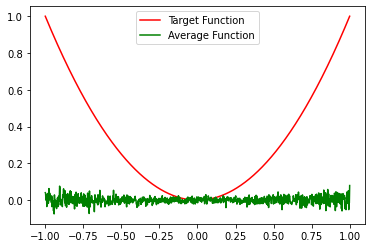

In [72]:
xs, fs, gs, avg_var, avg_bias, avg_eout = expirement(1000)

print('Eout: ', avg_eout)
print('Bias: ', avg_bias)
print('Variance: ', avg_var)
print('Bias + Variance: ', avg_var+avg_bias)

plt.plot(xs, fs, color='red', label='Target Function')
plt.plot(xs, gs, color='green', label='Average Function')    
plt.legend(['Target Function', 'Average Function'])

We can see that the value of Bias + Varias is very close to the out-of-sample error $E_{out}$

#### Exercise 3.7

##### For logistic regression, show that $$\Delta{E_{in}(w)} = -\frac{1}{N}\sum_{n=1}^N{\frac{y_nx_n}{1+e^{y_nw^Tx_n}}} = \frac{1}{N}\sum_{n=1}^N{-y_nx_n\theta{(-y_nw^Tx_n)}}$$

* We have $E_in(w) = \frac{1}{N}\sum_{n=1}^N{\ln{(1+e^{-y_nw^Tx_n}})}$

* So, $\Delta{E_in(w)} = -\frac{1}{N}\sum_{n=1}^N{\frac{y_nx_ne^{-y_nw^Tx_n}}{1+e^{-y_nw^Tx_n}}}$

* Multiply the denominator and numerator by $e^{y_nw^Tx_n}$: $\Delta{E_in(w)} = -\frac{1}{N}\sum_{n=1}^N{\frac{y_nx_n}{1+e^{y_nw^Tx_n}}}$

* We have $\theta{(s)} = \frac{e^{s}}{1+e^{s}}$

* So, $\theta{(-y_nw^Tx_n)} = \frac{e^{-y_nw^Tx_n}}{1+e^{-y_nw^Tx_n}}$

* Then, $\Delta{E_{in}(w)} = -\frac{1}{N}\sum_{n=1}^N{\frac{y_nx_n}{1+e^{y_nw^Tx_n}}} = \frac{1}{N}\sum_{n=1}^N{-y_nx_n\theta{(-y_nw^Tx_n)}}$

##### Argue that a ‘misclassified’ example contributes more to the gradient than a correctly classified one.

* The $\theta$ function has a reversed effect on the gradient becuase it depends on $-y_nw^Tx_n$

* The misclassified example will have a $y_nw^Tx_n < 0$ which means $\theta{-y_nw^Tx_n} > 0.5$

* While the correctly classified example will have $y_nw^Tx_n > 0$ which means $\theta{-y_nw^Tx_n} < 0.5$

* So, a ‘misclassified’ example contributes more to the gradient than a correctly classified one

#### Problem 3.12
##### In linear regression, the in-sample predictions are given by $\hat{y} = Hy$, where $H = X(X^TX)^{-1}X^T$. Show that $H$ is a projection matrix, i.e., $H^2 = H$. So $\hat{y}$ is the projection of $y$ onto some space. What is this space?

* $H^2 = X(X^TX)^{-1}X^TX(X^TX)^{-1}X^T = X(X^TX)^{-1}X^T = H$

* We have $\hat{y} = X[(X^TX)^{-1}X^Ty]$

* So, $\hat{y}$ is the projection of $y$ onto the space generated by the columns of $X$